In [ ]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
from keras import layers, models
from keras.datasets import cifar10
import numpy as np


In [24]:
# loading the dataset
(train_images , train_labels) , (test_images , test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 62s 0us/step


In [25]:
train_images[200]

array([[[105, 155, 204],
        [ 99, 150, 206],
        [111, 149, 195],
        ...,
        [113, 160,  87],
        [150, 197, 134],
        [164, 216, 142]],

       [[113, 169, 210],
        [ 85, 132, 183],
        [ 70, 101, 131],
        ...,
        [ 72, 136,  58],
        [107, 176, 102],
        [140, 207, 136]],

       [[106, 165, 209],
        [ 90, 132, 189],
        [ 47,  71, 108],
        ...,
        [ 75, 129,  89],
        [117, 185, 111],
        [120, 193, 111]],

       ...,

       [[ 55,  74, 127],
        [ 32,  13,  34],
        [ 36,  30,  21],
        ...,
        [ 12, 103,  76],
        [ 44,  92, 116],
        [103, 146, 186]],

       [[ 49, 103,  75],
        [ 50,  57,  21],
        [ 57,  76,  25],
        ...,
        [ 42, 141,  87],
        [ 86, 150, 154],
        [117, 172, 202]],

       [[ 60, 146,  50],
        [ 93, 137,  45],
        [ 95, 156,  63],
        ...,
        [ 97, 180, 151],
        [ 92, 165, 173],
        [ 84, 160, 196]]

In [ ]:
train_images.shape       #shape of the training data

(50000, 32, 32, 3)

In [ ]:
test_images.shape    #shape of the testing data

(10000, 32, 32, 3)

In [ ]:
train_images = train_images.astype("float32") / 255     #normalization of the training data
test_images = test_images.astype("float32") / 255       #normalization of the testing data

In [29]:
#Building the CNN model
model = models.Sequential([
    layers.Conv2D(32,(3,3) , activation = 'relu', padding = 'same' ,input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)) ,

    layers.Conv2D(64,(3,3) , activation = 'relu' , padding = 'same') ,
    layers.MaxPooling2D((2,2)) ,
    layers.Flatten() ,  #Classifier head
    layers.Dense(128 ,  activation = 'relu') ,
    layers.Dense(10 , activation = 'softmax') #10 classes in CIFAR-10

])

/opt/anaconda3/envs/anaconda-nlp/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#Compile the model
model.compile(optimizer = 'adam' ,
              loss = 'sparse_categorical_crossentropy' ,
              metrics = ['accuracy'])

In [31]:
#train the model

model.fit(train_images , train_labels , epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 32ms/step - accuracy: 0.4295 - loss: 1.5746
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.6416 - loss: 1.0168
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.7023 - loss: 0.8546
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7370 - loss: 0.7509
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.7747 - loss: 0.6445
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.8039 - loss: 0.5550
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.8364 - loss: 0.4671
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.8643 - loss: 0.3869
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.8897 - loss: 0.3162
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9130 - loss: 0.2539
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.9314 - loss: 0.2043
Epoch 12

/tmp/ipython-input-1006461761.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Actual :' + class_names[int(test_labels[rnd])])


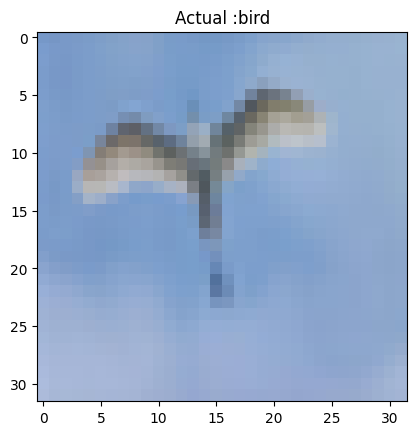

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step


In [ ]:
#building the class names list
import numpy as np
class_names = ['airplane' , 'automobile' , 'bird', 'cat' , ' deer' , 'dog' , 'frog' ,  'horse','ship' , 'truck']
#picking a random test image
rnd = random.randint(0 ,  len(test_images) -1)
#plotting the image and its label
plt.imshow(test_images[rnd])
plt.title('Actual :' + class_names[int(test_labels[rnd])])
plt.show()

#predict the class
y_pred= model.predict(test_images[rnd].reshape(1,32,32,3))
pred_class = class_names[np.argmax(y_pred)]